<a href="https://www.kaggle.com/code/ishankat/covid-19-cases-prediction-till-mid-23?scriptVersionId=187333522" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_global_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_global_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_deaths.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_metadata.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_us_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv
/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_metadata.csv
/kaggle/input/covid19-data-from-john-hopkins-university/RAW_us_deaths.csv
/kaggle/input/country-mapping-iso-continent-region/continents2.csv


# Importing Libraries and Modules

In [2]:
conda install libpython m2w64-toolchain -c msys2

Retrieving notices: ...working... done
Channels:
 - msys2
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - libpython
  - m2w64-toolchain

Current channels:

  - https://conda.anaconda.org/msys2
  - https://conda.anaconda.org/rapidsai
  - https://conda.anaconda.org/nvidia
  - https://conda.anaconda.org/conda-forge
  - defaults

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pystan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 35.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


# Import Datasets

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df0 = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_global_deaths.csv")

In [6]:
df0

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [7]:
df1

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


# Data Preparation

In [8]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
continent=pd.read_csv("/kaggle/input/country-mapping-iso-continent-region/continents2.csv")
continent["name"]=continent["name"].str.upper()

In [9]:
world.head()

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


In [10]:
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Now when you print the DataFrame, all rows will be shown
print(world)

# Reset option back to default to avoid potential issues later
pd.reset_option('display.max_rows')


                              Country        Cases
0                         Afghanistan     209451.0
1                             Albania     334457.0
2                             Algeria     271496.0
3                             Andorra      47890.0
4                              Angola     105288.0
5                          Antarctica         11.0
6                 Antigua and Barbuda       9106.0
7                           Argentina   10044957.0
8                             Armenia     447308.0
9                           Australia   11399460.0
10                            Austria    5961143.0
11                         Azerbaijan     828825.0
12                            Bahamas      37491.0
13                            Bahrain     710693.0
14                         Bangladesh    2037871.0
15                           Barbados     106798.0
16                            Belarus     994037.0
17                            Belgium    4739365.0
18                             

# Data Visualization

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np

# Assuming you have a DataFrame `world`
# Adjust the bins to cover all possible ranges
max_cases = world["Cases"].max()
bins = [-150000, 100000, 500000, 1500000, 5000000, 10000000, max_cases]
labels = ["U100K", "100Kto500K", "500Kto1.5M", "1.5Mto5M", "5Mto10M", "10M+"]

# Create a new column for case ranges
world["Cases Range"] = pd.cut(world["Cases"], bins, labels=labels, include_lowest=True)

# Generate Alpha-3 codes
alpha = []
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i = "BRUNEI DARUSSALAM"
    elif i == "US":
        i = "UNITED STATES"
    if len(continent[continent["name"] == i]["alpha-3"].values) == 0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"] == i]["alpha-3"].values[0])
world["Alpha3"] = alpha

# Define the correct color mapping for the labels
color_mapping = {
    "U100K": "green",
    "100Kto500K": "khaki",
    "500Kto1.5M": "yellow",
    "1.5Mto5M": "orange",
    "5Mto10M": "red",
    "10M+": "brown"
}

# Apply the color mapping to the data
world["Color"] = world["Cases Range"].map(color_mapping)

# Plotting the data
fig = px.choropleth(world.dropna(subset=["Alpha3"]),
                    locations="Alpha3",
                    color="Cases Range",
                    color_discrete_map=color_mapping,
                    projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


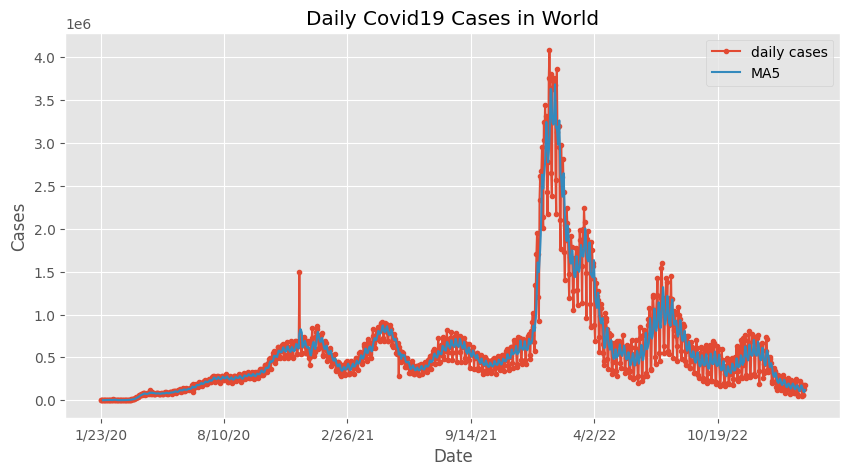

In [12]:
count = []
for i in range(1,len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

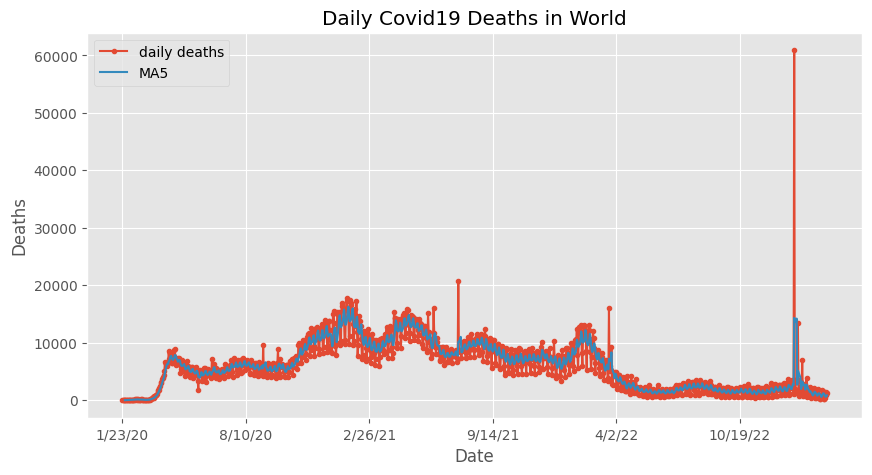

In [13]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# Prediction for next 30 Days

/tmp/ipykernel_33/738480942.py:22: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

08:18:23 - cmdstanpy - INFO - Chain [1] start processing
08:18:24 - cmdstanpy - INFO - Chain [1] done processing


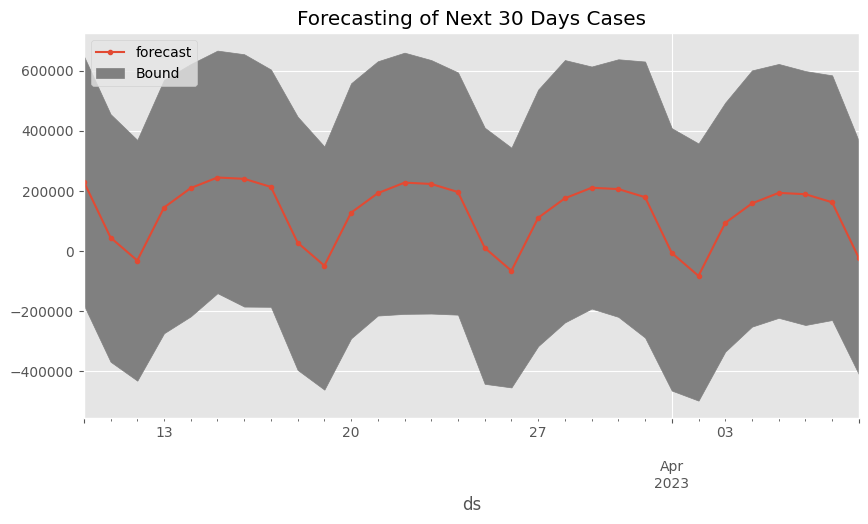

In [14]:
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
        
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()